# Analyze results of CPD perf.
Both energy and accuracy results

In [463]:
import os
import numpy as np

from matplotlib import pyplot as plt

csv_folder = "./datasets/csv"
# get multivaritae datasets from the csv folder
multi_datasets = ['occupancy', 'run_log', 'apple', 'bee_waggle_6']
multi_datasets.sort()
print(multi_datasets)

# univariate datasets are in the datasets folder
all_datasets = os.listdir(csv_folder)
all_datasets = [f.split('.')[0] for f in all_datasets]

univariate_datasets = [f for f in all_datasets if f not in multi_datasets]
print(len(univariate_datasets))
univariate_datasets.sort()
print(univariate_datasets)

# num of all watch verions
watch_count = 39
uni_count = len(univariate_datasets)
all_datasets_count = len(all_datasets)
multi_datasets_count = len(multi_datasets)



['apple', 'bee_waggle_6', 'occupancy', 'run_log']
38
['bank', 'bitcoin', 'brent_spot', 'businv', 'centralia', 'children_per_woman', 'co2_canada', 'construction', 'debt_ireland', 'gdp_argentina', 'gdp_croatia', 'gdp_iran', 'gdp_japan', 'global_co2', 'homeruns', 'iceland_tourism', 'jfk_passengers', 'lga_passengers', 'measles', 'nile', 'ozone', 'quality_control_1', 'quality_control_2', 'quality_control_3', 'quality_control_4', 'quality_control_5', 'rail_lines', 'ratner_stock', 'robocalls', 'scanline_126007', 'scanline_42049', 'seatbelts', 'shanghai_license', 'uk_coal_employ', 'unemployment_nl', 'us_population', 'usd_isk', 'well_log']


In [464]:
for i in range(uni_count):
    print(f"idx:i={i}, {univariate_datasets[i]}")

idx:i=0, bank
idx:i=1, bitcoin
idx:i=2, brent_spot
idx:i=3, businv
idx:i=4, centralia
idx:i=5, children_per_woman
idx:i=6, co2_canada
idx:i=7, construction
idx:i=8, debt_ireland
idx:i=9, gdp_argentina
idx:i=10, gdp_croatia
idx:i=11, gdp_iran
idx:i=12, gdp_japan
idx:i=13, global_co2
idx:i=14, homeruns
idx:i=15, iceland_tourism
idx:i=16, jfk_passengers
idx:i=17, lga_passengers
idx:i=18, measles
idx:i=19, nile
idx:i=20, ozone
idx:i=21, quality_control_1
idx:i=22, quality_control_2
idx:i=23, quality_control_3
idx:i=24, quality_control_4
idx:i=25, quality_control_5
idx:i=26, rail_lines
idx:i=27, ratner_stock
idx:i=28, robocalls
idx:i=29, scanline_126007
idx:i=30, scanline_42049
idx:i=31, seatbelts
idx:i=32, shanghai_license
idx:i=33, uk_coal_employ
idx:i=34, unemployment_nl
idx:i=35, us_population
idx:i=36, usd_isk
idx:i=37, well_log


## Univariate datasets

In [465]:
# analysis of univariate datasets
def get_accuracy_results(algorithm, version=-1, multi=False):
    # aggregate results from all univariate datasets
    accuracy_result_folder = "./results/pi_accuracy"
    # read all the results for f1 
    algo_name = algorithm.lower()
    if version == -1:
        result_file = os.path.join(accuracy_result_folder, algo_name + ".csv")
    else:
        result_file = os.path.join(
            accuracy_result_folder, algo_name + "_v" + str(version) + ".csv"
        )
    if multi:
        f1 = np.zeros(all_datasets_count)
    else:
        f1 = np.zeros(uni_count)

    with open(result_file, "r") as f:
        # skip first line
        f.readline()
        for line in f:
            if not multi:
                if line.split(",")[0] in multi_datasets:
                    continue
            line = line.strip().split(",")
            cur_f1 = float(line[1])
            dataset_name = line[0]
            # find position to insert
            pos = -1
            for i in range(len(f1)):
                if multi:
                    if all_datasets[i] == dataset_name:
                        pos = i
                        f1[pos] = cur_f1
                        break
                else:
                    if univariate_datasets[i] == dataset_name:
                        pos = i
                        f1[pos] = cur_f1
                        break
            if pos == -1:
                exit("Dataset not found")
    return f1

In [466]:
cusum_f1 = get_accuracy_results("CUSUM")

bocpd_f1 = get_accuracy_results("BOCPD")
bocpdms_f1 = get_accuracy_results("BOCPDMS", multi=True)

pelt_f1 = get_accuracy_results("PELT", multi=True)

watch_f1_list = []
for i in range(0, 39):
    r = get_accuracy_results("WATCH", i, multi=True)
    watch_f1_list.append(r)
    


In [467]:

def get_energy_results(algorithm, version=-1, multi=False):
    # aggregate results from all univariate datasets
    accuracy_result_folder = "./results/pi_energy"
    # read all the results for f1 and cover, then sum them up
    # return the sum
    algo_name = algorithm.lower()
    if version==-1:
        result_file = os.path.join(accuracy_result_folder, algo_name + ".csv")
    else:
        result_file = os.path.join(accuracy_result_folder, algo_name + "_v" + str(version) + ".csv")
    if multi:
        energy = np.zeros(all_datasets_count)
    else:
        energy = np.zeros(uni_count)
        
    with open(result_file, 'r') as f:
        # skip first line
        f.readline()
        for line in f:
            if not multi:
                if line.split(',')[0] in multi_datasets:
                    continue
                    
            line = line.strip().split(',')
            cur_energy = float(line[2])
            dataset_name = line[0]
            # find position to insert
            pos = -1
            for i in range(len(energy)):
                if multi:
                    if all_datasets[i] == dataset_name:
                        pos = i
                        energy[pos] = cur_energy
                        break
                else:
                    if univariate_datasets[i] == dataset_name:
                        pos = i
                        energy[pos] = cur_energy
                        break
            if pos == -1:
                exit('Dataset not found')
    return energy

In [468]:

cusum_energy = get_energy_results("CUSUM")


# bocpd_results = get_accuracy_results("BOCPD")
bocpd_energy = get_energy_results("BOCPD")

pelt_energy = get_energy_results("PELT", multi=True)

bocpdms_energy = get_energy_results("BOCPDMS", multi=True)

print(bocpdms_energy.shape)
watch_energy_list = []
for i in range(0, 39):
    r = get_energy_results("WATCH", i, multi=True)
    watch_energy_list.append(r)
    

(42,)


In [469]:
from scipy.stats import rankdata
def ranking(array, order = "ascending"):
    rankings  = rankdata(array, method='min')
    if order == "descending":
        rankings = len(rankings) - rankings + 1
    return rankings
    


In [470]:
watch_multi_accuracy = watch_f1_list
    
watch_multi_energy = watch_energy_list


In [471]:
# for all versions of WATCH, rank them based on f1 , then sum the ranks
watch_f1_rankings = np.zeros((watch_count, all_datasets_count))
for i in range(all_datasets_count):
    cur_data = np.zeros(watch_count)
    for j in range(watch_count):
        cur_data[j] = watch_multi_accuracy[j][i]
    cur_ranking = ranking(cur_data, "descending")
    watch_f1_rankings[:, i] = cur_ranking

# for all versions of WATCH, rank them based on energy, then sum the ranks
watch_energy_rankings = np.zeros((watch_count, all_datasets_count))
for i in range(len(univariate_datasets)):
    cur_data = np.zeros(watch_count)
    for j in range(watch_count):
        cur_data[j] = watch_multi_energy[j][i]
    cur_ranking = ranking(cur_data, "ascending")
    watch_energy_rankings[:, i] = cur_ranking

In [472]:
watch_f1_avg_rank = np.mean(watch_f1_rankings, axis=1)
watch_energy_avg_rank = np.mean(watch_energy_rankings, axis=1)

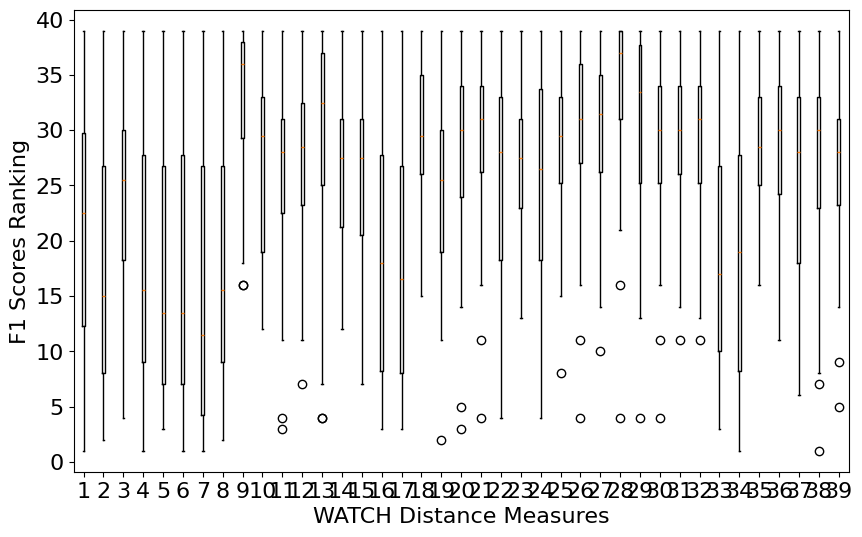

In [473]:
# box plot of f1 score rankings for WATCH
data = watch_f1_rankings
plt.figure(figsize=(10, 6))
for i in range(39):
    plt.boxplot(data[i], positions=[i])
plt.xlabel("WATCH Distance Measures")
plt.ylabel("F1 Scores Ranking")

# add label to each measure, but also add 1 to the index
# because the index starts from 0
labels = [f"{i+1}" for i in range(39)]
plt.xticks(range(39), labels, rotation=0)
plt.show()


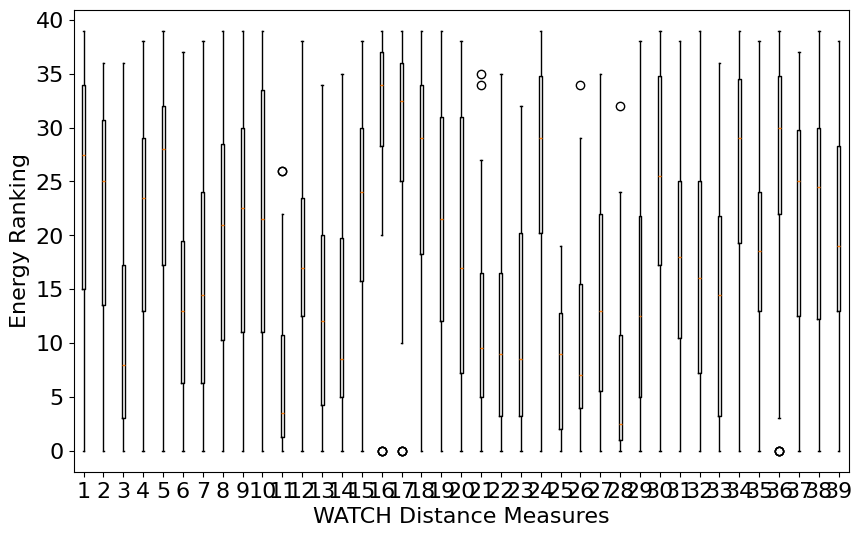

In [474]:
# box plot of energy rankings for WATCH
data = watch_energy_rankings
plt.figure(figsize=(10, 6))
for i in range(39):
    plt.boxplot(data[i], positions=[i])
plt.xlabel("WATCH Distance Measures")
plt.ylabel("Energy Ranking")

labels = [f"{i+1}" for i in range(39)]
plt.xticks(range(39), labels, rotation=0)
plt.show()

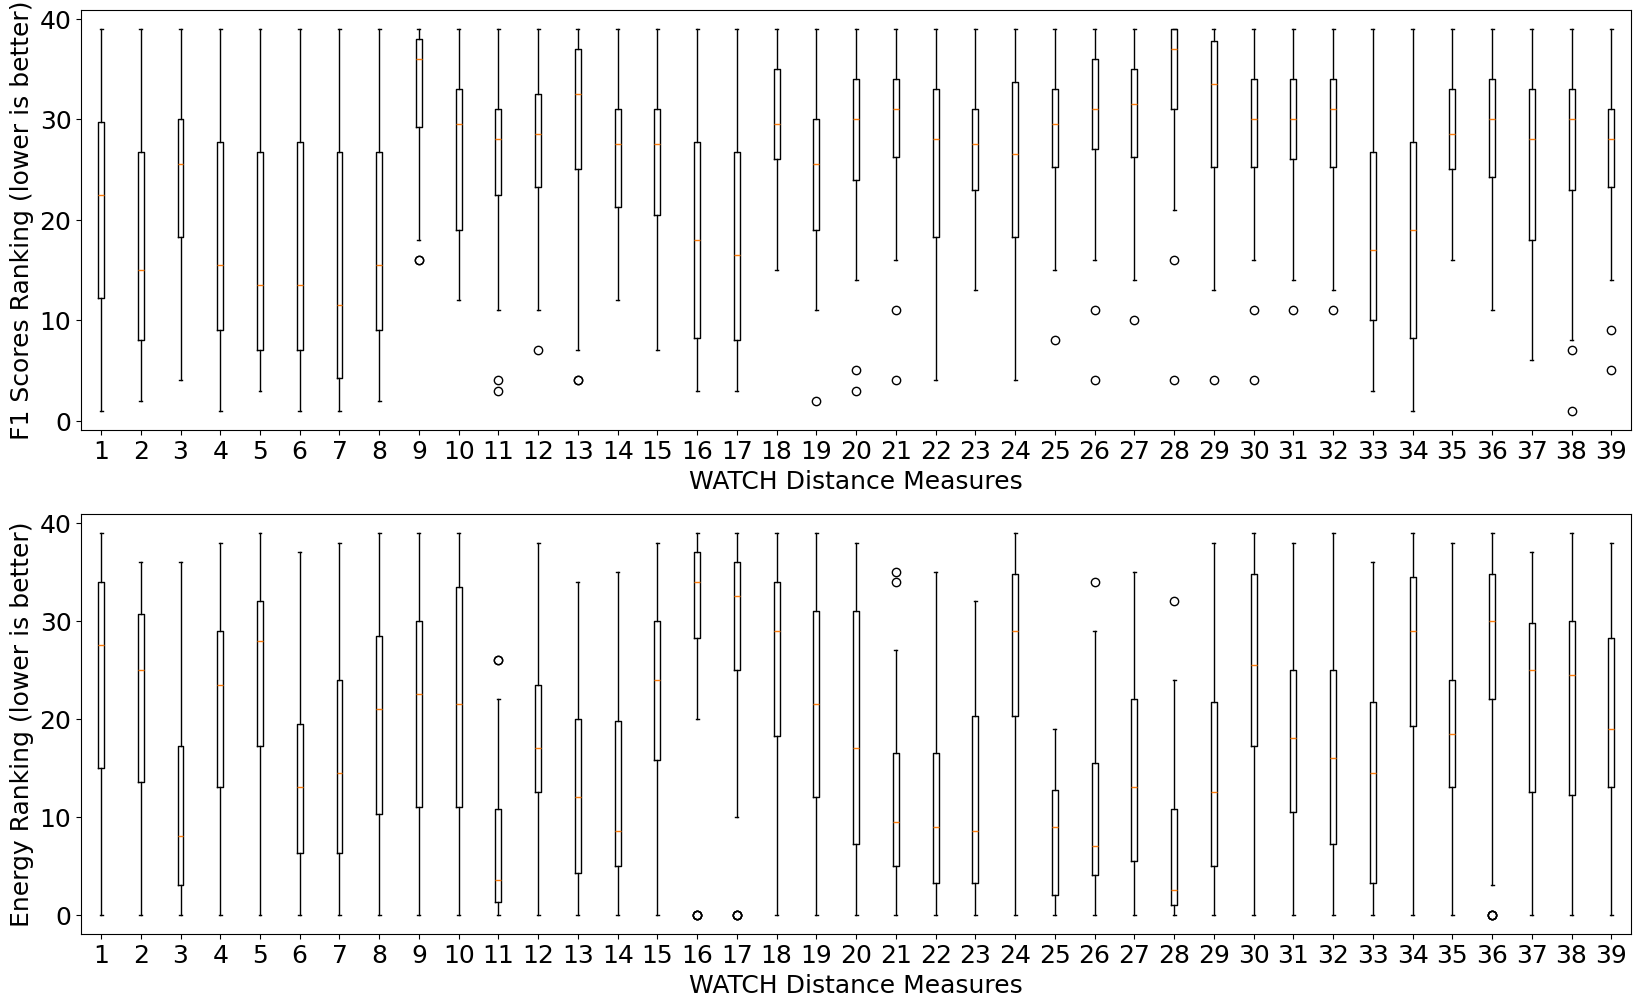

In [475]:
# two boxplot in one figure
# bigger text
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

data = watch_f1_rankings
for i in range(39):
    axs[0].boxplot(data[i], positions=[i])
axs[0].set_xlabel("WATCH Distance Measures")
axs[0].set_ylabel("F1 Scores Ranking (lower is better)")
labels = [f"{i+1}" for i in range(39)]
axs[0].set_xticks(range(39))
axs[0].set_xticklabels(labels, rotation=0)

data = watch_energy_rankings
for i in range(39):
    axs[1].boxplot(data[i], positions=[i])
axs[1].set_xlabel("WATCH Distance Measures")
axs[1].set_ylabel("Energy Ranking (lower is better)")

axs[1].set_xticks(range(39))
axs[1].set_xticklabels(labels, rotation=0)
plt.show()

In [476]:
# pareto front analysis of all WATCH versions
pareto_front = []
pf_idx = []
for i in range(39):
    cur_f1 = watch_f1_avg_rank[i]
    cur_energy = watch_energy_avg_rank[i]
    dominated = False
    for j in range(39):
        if i == j:
            continue
        if watch_f1_avg_rank[j] <= cur_f1 and watch_energy_avg_rank[j] <= cur_energy:
            dominated = True
            break
    if not dominated:
        pareto_front.append((i, cur_f1, cur_energy))
        pf_idx.append(i)
print(pf_idx)



[2, 5, 6, 10, 21]


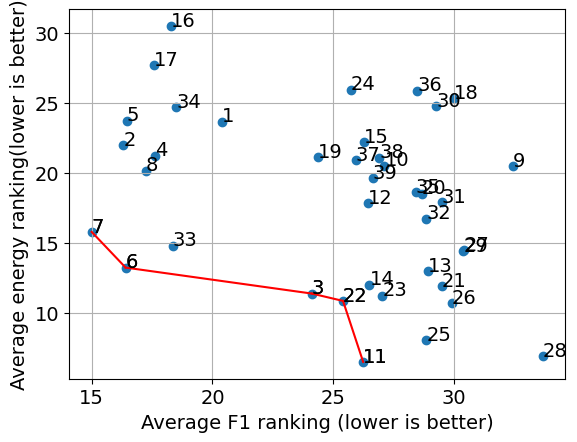

In [477]:
# plot the pareto front
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
ax.scatter(watch_f1_avg_rank, watch_energy_avg_rank)    
for i in range(39):
    ax.annotate(str(i+1), (watch_f1_avg_rank[i], watch_energy_avg_rank[i]))
for i in range(len(pareto_front)):
    ax.annotate(int(pareto_front[i][0])+1, (pareto_front[i][1], pareto_front[i][2]))
# add pareto front line, from the first to the last

pareto_front = np.array(pareto_front)
pareto_front = pareto_front[np.argsort(pareto_front[:, 1])]
for i in range(len(pareto_front) - 1):
    ax.plot(pareto_front[i:i+2, 1], pareto_front[i:i+2, 2], 'r-')

# add grid lines
plt.grid(True)

plt.xlabel("Average F1 ranking (lower is better)")
plt.ylabel("Average energy ranking(lower is better)")
plt.show()

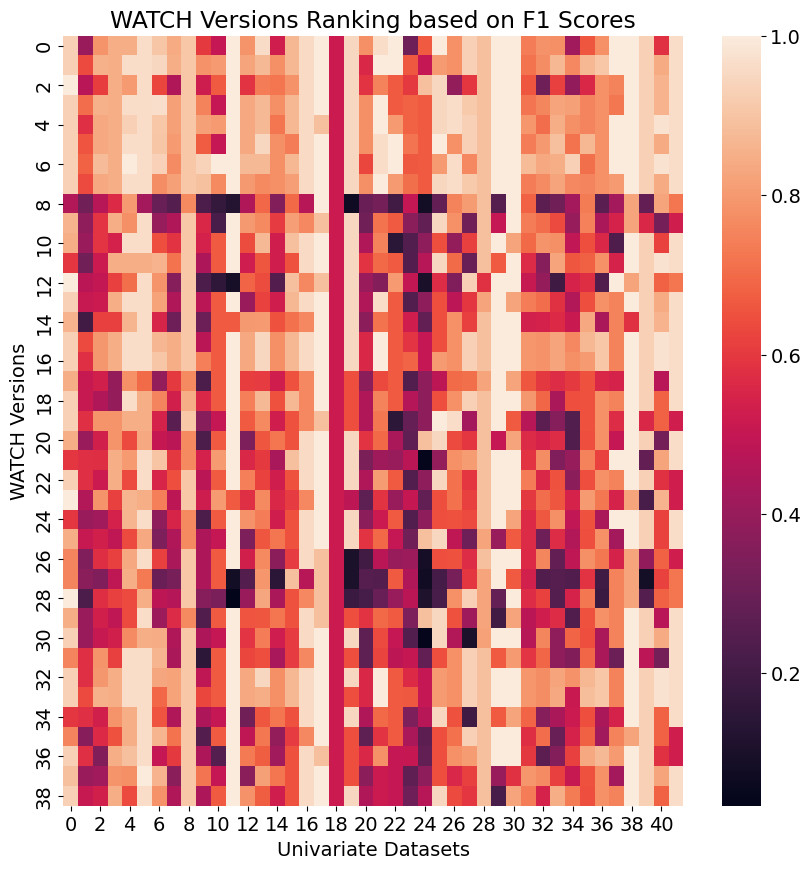

In [478]:
# heatmap of all watch versions f1
# change color scheme
# make  the image larger
# use seaborn in this figure
import seaborn as sns
data = watch_multi_accuracy

# convert data to numpy array
data = np.array(data)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, ax=ax)
plt.xlabel("Univariate Datasets")
plt.ylabel("WATCH Versions")
plt.title("WATCH Versions Ranking based on F1 Scores")
plt.show()
    

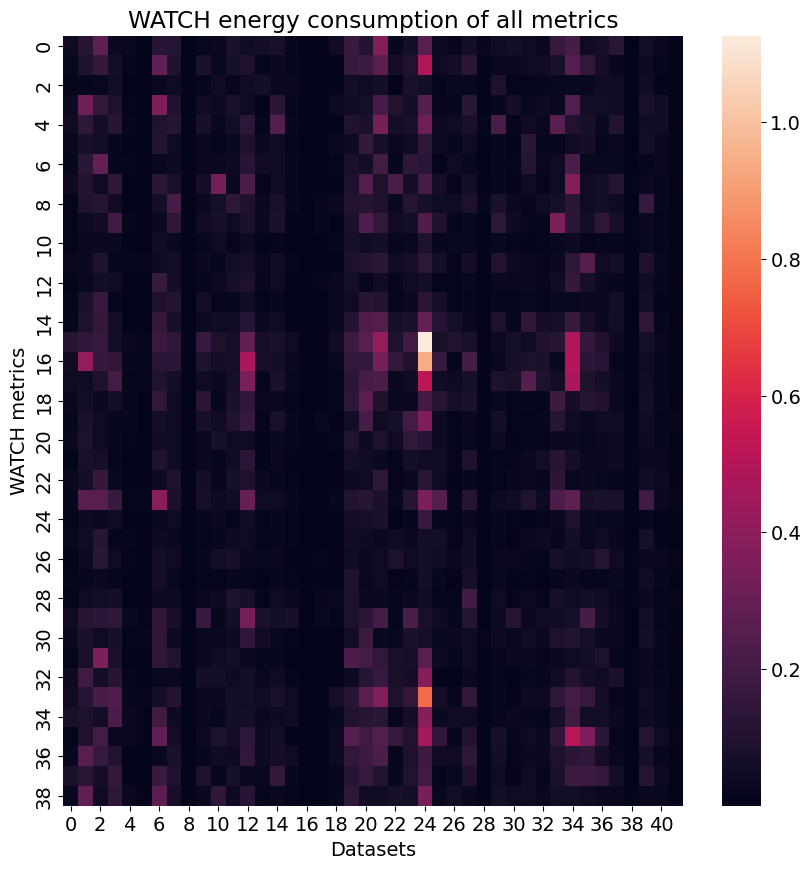

In [479]:
# watch energy heatmap, using seaborn
data = watch_multi_energy
data = np.array(data)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, ax=ax)
plt.ylabel("WATCH metrics")
plt.xlabel("Datasets")
plt.title("WATCH energy consumption of all metrics")
plt.show()

In [480]:
# use metrics in the pareto front to compare with another algorithms, such as CUSUM, BOCPD, PELT
# use v6, v2, v10 as representative of the WATCH versions
# univariate datasets only now
watch_2_acc = watch_multi_accuracy[2][0:38]
watch_6_acc = watch_multi_accuracy[6][0:38]
watch_10_acc = watch_multi_accuracy[10][0:38]

watch_2_energy = watch_multi_energy[2][0:38]
watch_6_energy = watch_multi_energy[6][0:38]
watch_10_energy = watch_multi_energy[10][0:38]

# compare with CUSUM, BOCPD, PELT, and BOCPDMS
cusum_acc = cusum_f1[0:38]
cusum_energy = cusum_energy[0:38]

bocpd_acc = bocpd_f1[0:38]
bocpd_energy = bocpd_energy[0:38]

pelt_multi_acc = pelt_f1[38:]
pelt_acc = pelt_f1[0:38]
pelt_multi_energy = pelt_energy[38:]
pelt_energy = pelt_energy[0:38]

bocpdms_multi_acc = bocpdms_f1[38:]
bocpdms_multi_energy = bocpdms_energy[38:]
bocpdms_acc = bocpdms_f1[0:38]
bocpdms_energy = bocpdms_energy[0:38]


In [481]:
accuracy_candidates = [watch_2_acc,  watch_6_acc, watch_10_acc,  cusum_acc, bocpd_acc, pelt_acc, bocpdms_acc]
energy_candidates = [watch_2_energy,  watch_6_energy, watch_10_energy,  cusum_energy, bocpd_energy, pelt_energy, bocpdms_energy]
# the version number ha to add 1 as the index in documntation starts from 1
algorithm_names = ["WATCH_3",  "WATCH_7", "WATCH_11",  "CUSUM", "BOCPD", "PELT", "BOCPDMS"]

In [482]:
# generate latex table  for selected dataset index in energy_candidates, each dataset as a row, each algorithm as a column
idx = [0,13,18,22]
for i in idx:
    output_str=""
    output_str += univariate_datasets[i]
    output_str += " & "
    for j in range(len(algorithm_names)):
        # truncate to 3  decimal places
        output_str += "{:.3f}".format(energy_candidates[j][i])
        output_str += " & "
    output_str = output_str[:-2]
    output_str += "\\\\"
    output_str += "\n"
    print(output_str)


bank & 0.016 & 0.018 & 0.013 & 0.045 & 0.820 & 1.284 & 23.135 \\

global_co2 & 0.066 & 0.050 & 0.006 & 0.004 & 0.088 & 1.697 & 28.578 \\

measles & 0.004 & 0.010 & 0.016 & 0.051 & 2.024 & 0.669 & 23.585 \\

quality_control_2 & 0.009 & 0.021 & 0.020 & 0.030 & 0.301 & 8.335 & 102.534 \\



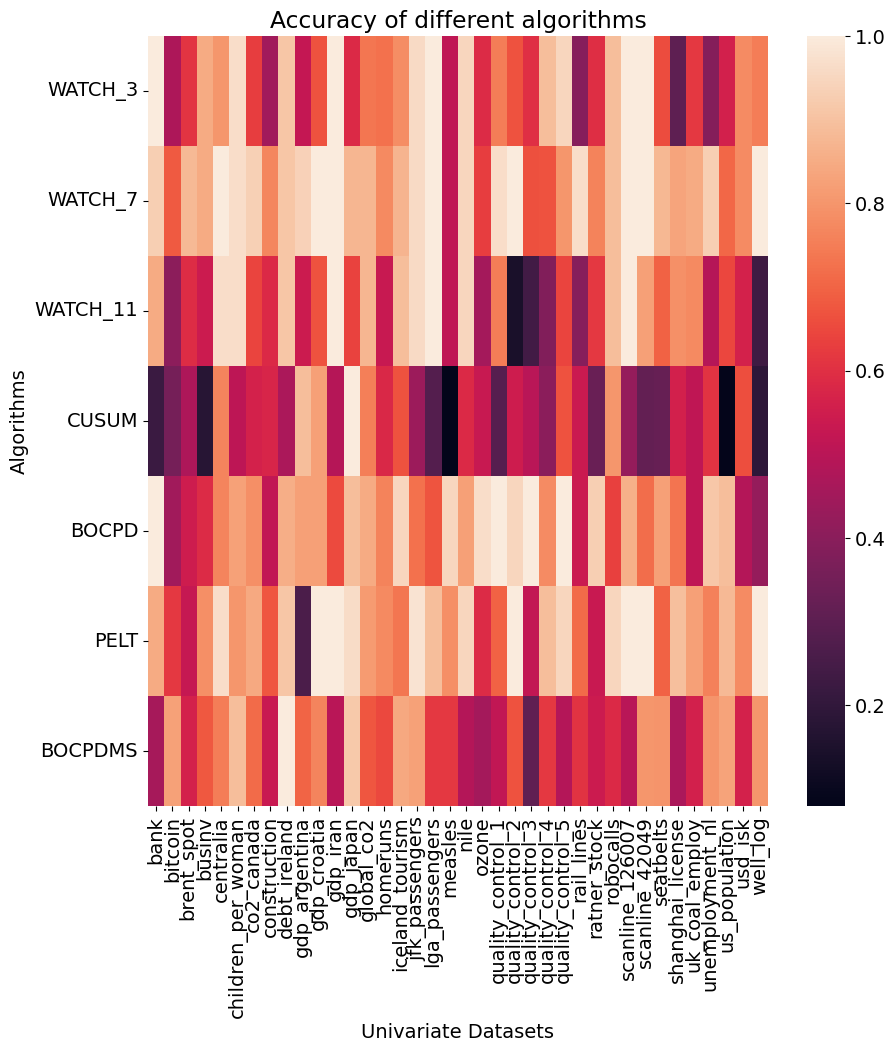

In [483]:
# heatmap of accuracy, use sns
data = np.array(accuracy_candidates)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, ax=ax)
plt.title("Accuracy of different algorithms")
# add algorithm names, pos at middle of the cell
plt.yticks(np.arange(len(algorithm_names)) + 0.5, algorithm_names, rotation=0)
plt.ylabel("Algorithms")
plt.xlabel("Univariate Datasets")
# add dataset names, from 0 to 37,  dataset names are in univariate_datasets
plt.xticks(np.arange(38) + 0.5, univariate_datasets, rotation=90)
plt.show()



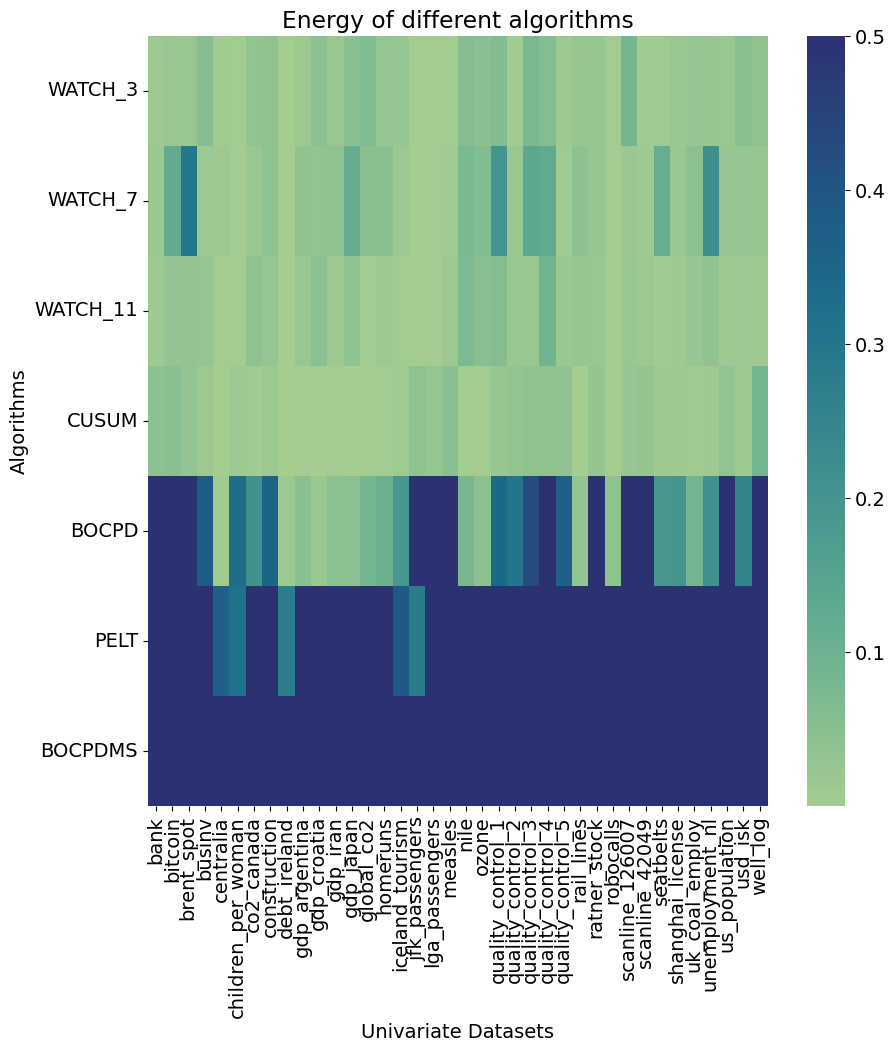

In [484]:
# heatmap of energy, use sns
data = np.array(energy_candidates)
fig, ax = plt.subplots(figsize=(10, 10))
# limit range to 0 to 100

data = np.clip(data, 0, 0.5)
# use a different color scheme for waider data range
sns.heatmap(data, ax=ax, cmap='crest')
plt.title("Energy of different algorithms")
# add algorithm names, pos at middle of the cell
plt.yticks(np.arange(len(algorithm_names)) + 0.5, algorithm_names, rotation=0)
plt.ylabel("Algorithms")
plt.xlabel("Univariate Datasets")
# add dataset names, from 0 to 37,  dataset names are in univariate_datasets
plt.xticks(np.arange(38) + 0.5, univariate_datasets, rotation=90)
# boundary of the cells



plt.show()



In [485]:
# ranking of the algorithms based on accuracy
accuracy_rankings = np.zeros((len(accuracy_candidates), 38))
for i in range(38):
    cur_data = np.zeros(len(accuracy_candidates))
    for j in range(len(accuracy_candidates)):
        cur_data[j] = accuracy_candidates[j][i]
    cur_ranking = ranking(cur_data, "descending")
    accuracy_rankings[:, i] = cur_ranking
    
# ranking of the algorithms based on energy
energy_rankings = np.zeros((len(energy_candidates), 38))
for i in range(38):
    cur_data = np.zeros(len(energy_candidates))
    for j in range(len(energy_candidates)):
        cur_data[j] = energy_candidates[j][i]
    cur_ranking = ranking(cur_data, "ascending")
    energy_rankings[:, i] = cur_ranking




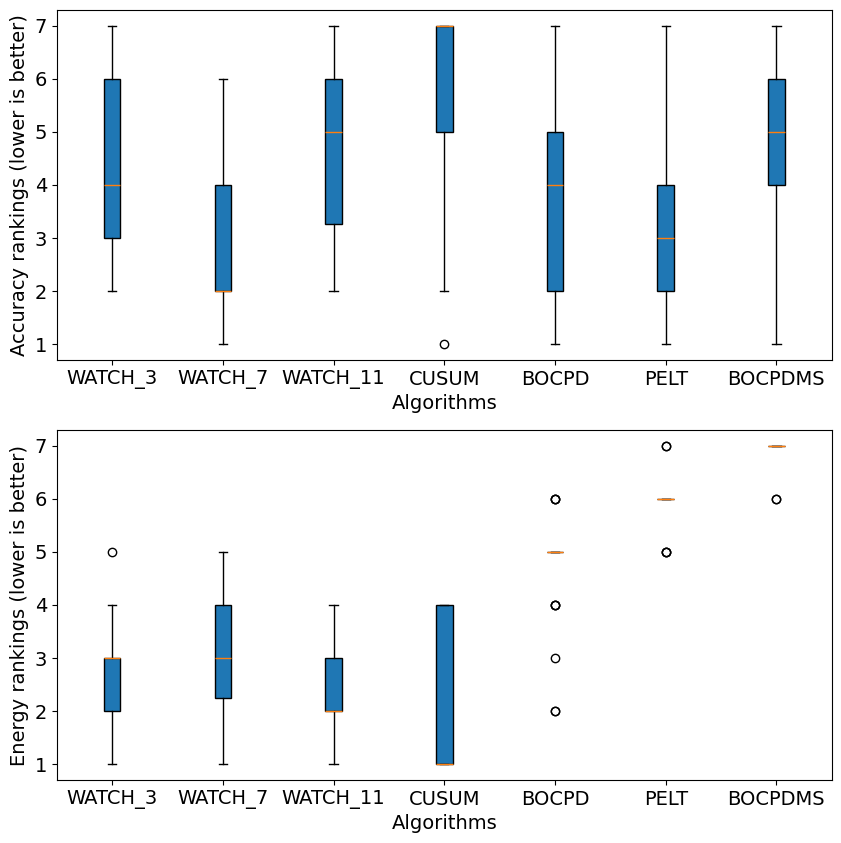

In [486]:
# box plot of accuracy rankings and energy rankings, in 2 subplots
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
data = accuracy_rankings
for i in range(len(accuracy_candidates)):
    # fill bar with color
    ax[0].boxplot(data[i], positions=[i], patch_artist=True)
ax[0].set_xlabel("Algorithms")
ax[0].set_ylabel("Accuracy rankings (lower is better)")
ax[0].set_xticks(np.arange(len(algorithm_names)))
ax[0].set_xticklabels(algorithm_names, rotation=0)
data = energy_rankings
for i in range(len(energy_candidates)):
    ax[1].boxplot(data[i], positions=[i], patch_artist=True)
ax[1].set_xlabel("Algorithms")
ax[1].set_ylabel("Energy rankings (lower is better)")
ax[1].set_xticks(np.arange(len(algorithm_names)))
ax[1].set_xticklabels(algorithm_names, rotation=0)
plt.show()


In [487]:
# pareto front analysis of the algorithms
pareto_front_all = []
pareto_front_idx = []
for i in range(len(accuracy_candidates)):
    cur_acc = accuracy_rankings[i]
    cur_energy = energy_rankings[i]
    dominated = False
    for j in range(len(accuracy_candidates)):
        if i == j:
            continue
        if np.all(np.logical_and(accuracy_rankings[j] <= cur_acc, energy_rankings[j] <= cur_energy)):
            dominated = True
            break
    if not dominated:
        pareto_front_all.append((i, cur_acc, cur_energy))
        pareto_front_idx.append(i)
print(pareto_front_idx)


[0, 1, 2, 3, 4, 5, 6]


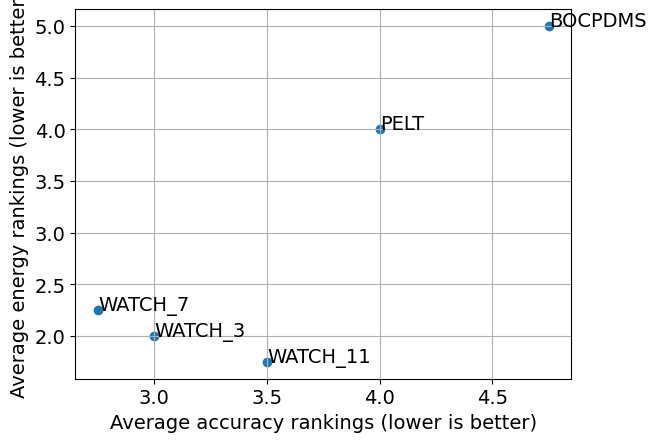

In [497]:
# scatter plot of accuracy and energy rankings

# add more margin
# plt.figure(figsize=(6, 6))
plt.scatter(np.mean(accuracy_rankings, axis=1), np.mean(energy_rankings, axis=1))
for i in range(len(algorithm_names)):
    plt.annotate(algorithm_names[i], (np.mean(accuracy_rankings, axis=1)[i], np.mean(energy_rankings, axis=1)[i]))
# draw pareto front

plt.grid(True)
plt.xlabel("Average accuracy rankings (lower is better)")
plt.ylabel("Average energy rankings (lower is better)")
plt.show()



In [489]:
# from now , ue multi datasets only
# get accuracy and energy results of all algorithms
# multi datasets algorithms are: WATCH, PELT, BOCPDMS
watch_2_acc = watch_multi_accuracy[2][38:]
watch_6_acc = watch_multi_accuracy[6][38:]
watch_10_acc = watch_multi_accuracy[10][38:]

watch_2_energy = watch_multi_energy[2][38:]
watch_6_energy = watch_multi_energy[6][38:]
watch_10_energy = watch_multi_energy[10][38:]



In [490]:
accuracy_candidates = [watch_2_acc,  watch_6_acc, watch_10_acc,  pelt_multi_acc, bocpdms_multi_acc]
energy_candidates = [watch_2_energy,  watch_6_energy, watch_10_energy,  pelt_multi_energy, bocpdms_multi_energy]
# the version number ha to add 1 as the index in documntation starts from 1
algorithm_names = ["WATCH_3",  "WATCH_7", "WATCH_11", "PELT", "BOCPDMS"]


In [491]:
for a in energy_candidates:
    print(a)

[0.00237995 0.05263201 0.00634916 0.0025303 ]
[0.00139618 0.02227537 0.03530916 0.00390827]
[0.00104851 0.02374628 0.01632086 0.00275339]
[  0.29321869 182.37394662   3.31807173   0.37364484]
[  1.57354495 301.47978159  56.44907566   5.36896065]


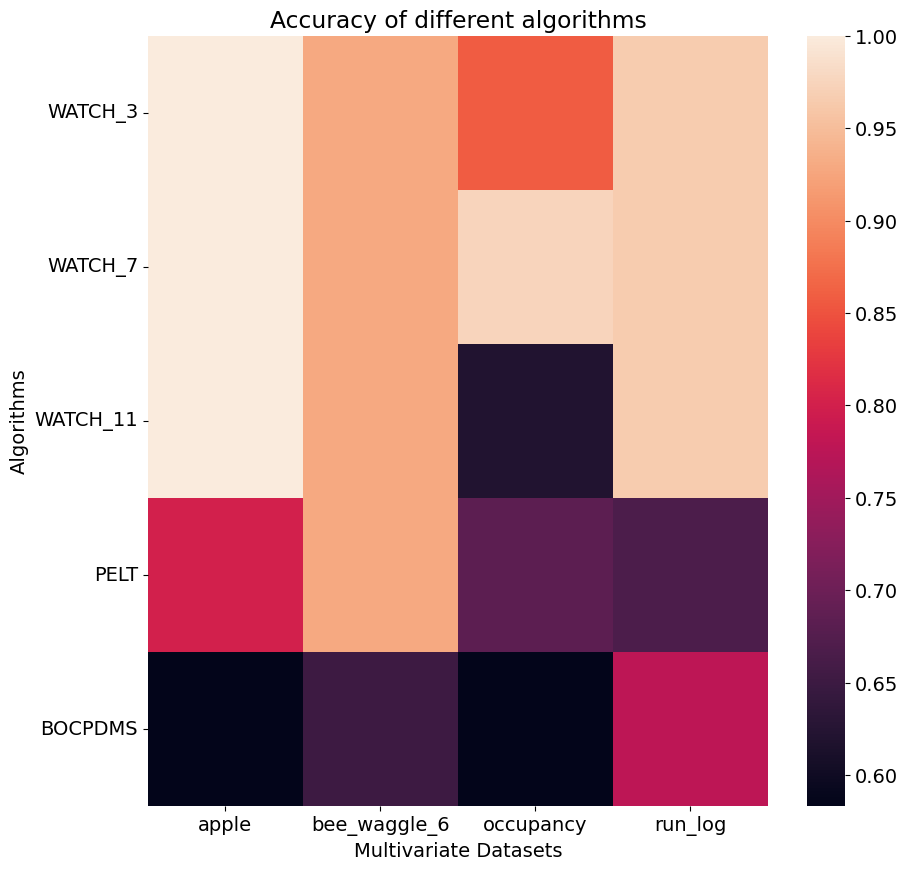

In [492]:
# heatmap of accuracy, use sns
data = np.array(accuracy_candidates)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, ax=ax)
plt.title("Accuracy of different algorithms")
# add algorithm names, pos at middle of the cell
plt.yticks(np.arange(len(algorithm_names)) + 0.5, algorithm_names, rotation=0)
plt.ylabel("Algorithms")
plt.xlabel("Multivariate Datasets")
# add dataset names, use dataset names in multi_datasets
plt.xticks(np.arange(len(multi_datasets)) + 0.5, multi_datasets, rotation=0)
plt.show()



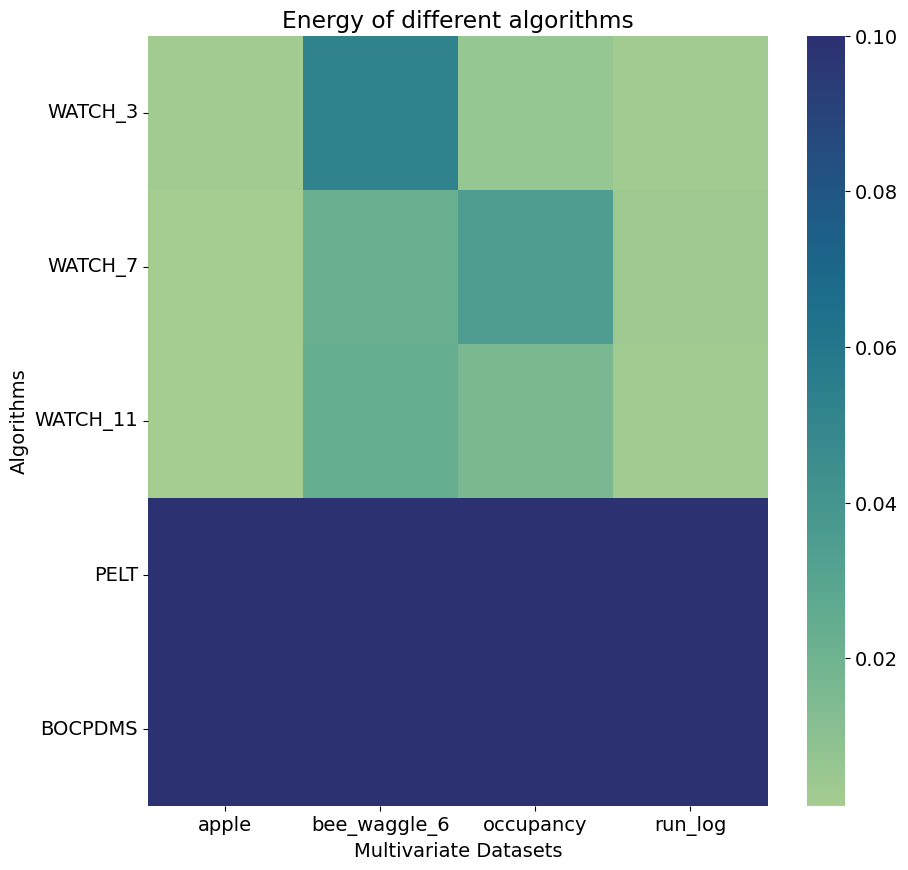

In [493]:
# heatmap of energy, use sns
data = np.array(energy_candidates)
fig, ax = plt.subplots(figsize=(10, 10))


data = np.clip(data, 0, 0.1)
# use a different color scheme for show smaller is greener
sns.heatmap(data, ax=ax, cmap='crest')
plt.title("Energy of different algorithms")
# add algorithm names, pos at middle of the cell
plt.yticks(np.arange(len(algorithm_names)) + 0.5, algorithm_names, rotation=0)
plt.ylabel("Algorithms")
plt.xlabel("Multivariate Datasets")
# add dataset names, use dataset names in multi_datasets
plt.xticks(np.arange(len(multi_datasets)) + 0.5, multi_datasets, rotation=0)
plt.show()


In [494]:
# ranking of the algorithms based on accuracy
accuracy_rankings = np.zeros((len(accuracy_candidates), len(multi_datasets)))
for i in range(len(multi_datasets)):
    cur_data = np.zeros(len(accuracy_candidates))
    for j in range(len(accuracy_candidates)):
        cur_data[j] = accuracy_candidates[j][i]
    cur_ranking = ranking(cur_data, "descending")
    accuracy_rankings[:, i] = cur_ranking

# ranking of the algorithms based on energy
energy_rankings = np.zeros((len(energy_candidates), len(multi_datasets)))
for i in range(len(multi_datasets)):
    cur_data = np.zeros(len(energy_candidates))
    for j in range(len(energy_candidates)):
        cur_data[j] = energy_candidates[j][i]
    cur_ranking = ranking(cur_data, "ascending")
    energy_rankings[:, i] = cur_ranking


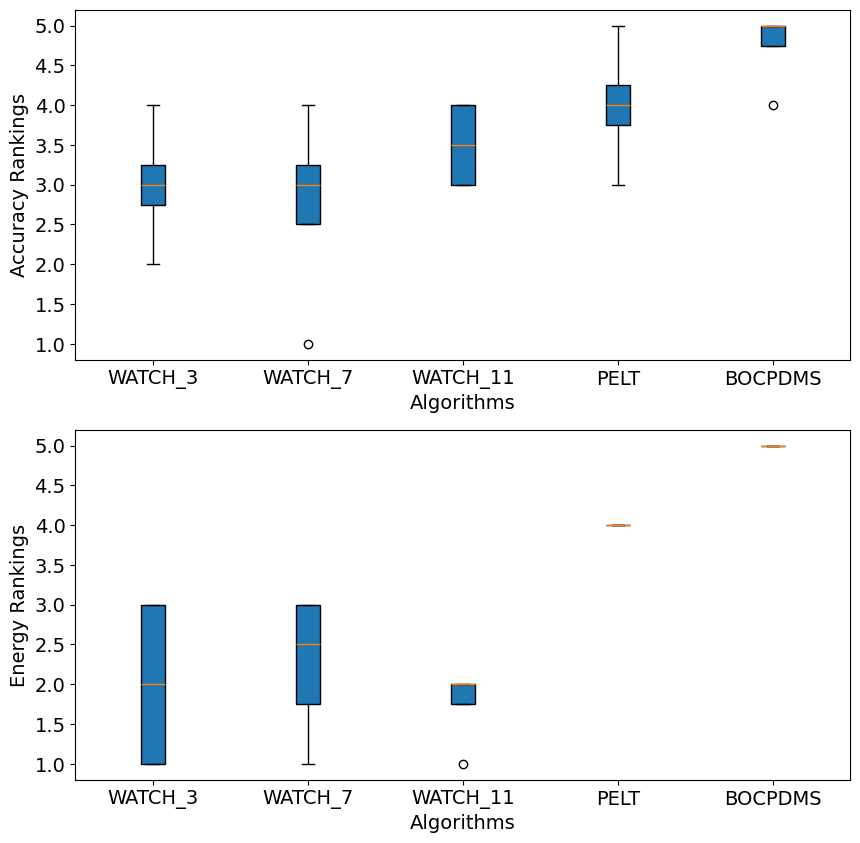

In [495]:
# box plot of accuracy rankings and energy rankings, in 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
data = accuracy_rankings
for i in range(len(accuracy_candidates)):
    # fill bar with color
    ax[0].boxplot(data[i], positions=[i], patch_artist=True)
ax[0].set_xlabel("Algorithms")
ax[0].set_ylabel("Accuracy Rankings")
ax[0].set_xticks(np.arange(len(algorithm_names)))
ax[0].set_xticklabels(algorithm_names, rotation=0)
data = energy_rankings
for i in range(len(energy_candidates)):
    ax[1].boxplot(data[i], positions=[i], patch_artist=True)
ax[1].set_xlabel("Algorithms")
ax[1].set_ylabel("Energy Rankings")
ax[1].set_xticks(np.arange(len(algorithm_names)))
ax[1].set_xticklabels(algorithm_names, rotation=0)
plt.show()


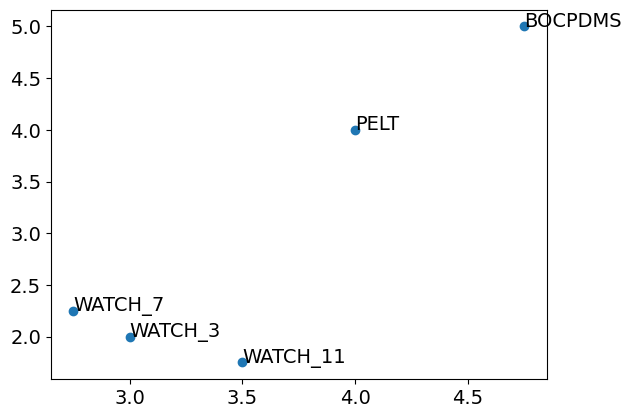

In [496]:
# scatter plot of accuracy and energy rankings

plt.scatter(np.mean(accuracy_rankings, axis=1), np.mean(energy_rankings, axis=1))
for i in range(len(algorithm_names)):
    plt.annotate(algorithm_names[i], (np.mean(accuracy_rankings, axis=1)[i], np.mean(energy_rankings, axis=1)[i]))
plt.show()
